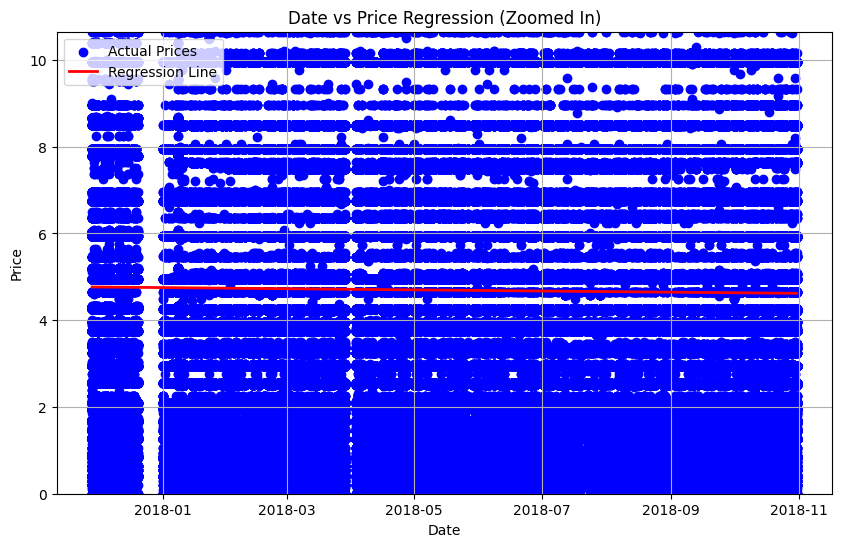

In [58]:
import json
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from datetime import datetime

# File paths
file_paths = ['invoices-2017-11.json', 'invoices-2017-12.json', 'invoices-2018-01.json', 'invoices-2018-02.json', 'invoices-2018-03.json', 'invoices-2018-04.json', 'invoices-2018-05.json', 'invoices-2018-06.json', 'invoices-2018-07.json', 'invoices-2018-08.json', 'invoices-2018-09.json', 'invoices-2018-10.json']
# file_paths = ['invoices-2017-12.json', 'invoices-2018-01.json']
# file_paths = ['invoices-2017-12.json', 'invoices-2018-01.json']
# file_paths = ['invoices-2017-11-mod.json', 'invoices-2017-12-mod.json']



# # Opening JSON file
# # f = open('invoices-2017-12-mod.json')

# # returns JSON object as 
# # a dictionary
# data = json.load(f)

# # Iterating through the json
# # list
# for i in data:
#     print(i["price"])

# # Closing file
# f.close()
# Function to read JSON files and extract data
def read_json_files(file_paths):
    data = []
    for file_path in file_paths:
        with open(file_path, 'r') as file:
            invoices = json.load(file)
            for invoice in invoices:
                year = int(invoice['year'])
                month = int(invoice['month'])
                day = int(invoice['day'])
                date_str = f"{year}-{month:02d}-{day:02d}"
                # Check for both price and total_price keys
                price = invoice.get('price', invoice.get('total_price'))
                
                if price is not None:
                    data.append((date_str, price))
    return data

# Read data from JSON files
data = read_json_files(file_paths)
# print(data)

# Convert data to DataFrame
df = pd.DataFrame(data, columns=['date', 'price'])

# Convert date strings to datetime objects and then to numerical values (e.g., days since a reference date)
df['date'] = pd.to_datetime(df['date'])
df['date_numeric'] = (df['date'] - df['date'].min()).dt.days

# Prepare X and y for regression
X = df[['date_numeric']]
y = df['price']

# Create and train the regression model
model = LinearRegression()
model.fit(X, y)

# Predict y values
y_pred = model.predict(X)

# Zooming in by adjusting y-axis limits (optional)
plt.figure(figsize=(10, 6))
plt.scatter(df['date'], y, color='blue', label='Actual Prices')
plt.plot(df['date'], y_pred, color='red', linewidth=2, label='Regression Line')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Date vs Price Regression (Zoomed In)')
plt.ylim(0, df['price'].quantile(0.95))  # Adjust the y-axis limits to zoom in
plt.legend()
plt.grid(True)
plt.show()